In [1]:
import pickle
import numpy as np

In [4]:
with open("data/clustering.pkl", "rb") as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering["X"])
y = np.array(data_clustering["Y"])

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

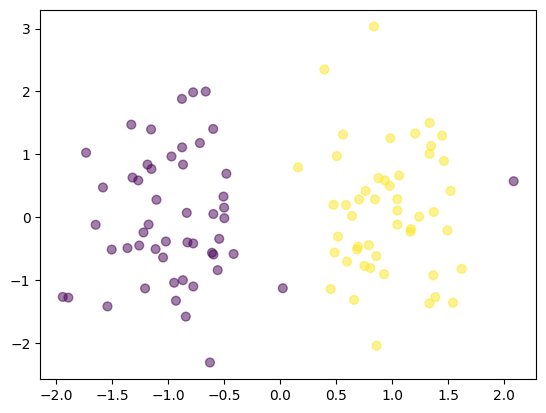

In [8]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, alpha=0.5)
plt.show()

In [9]:
from sklearn.cluster import KMeans

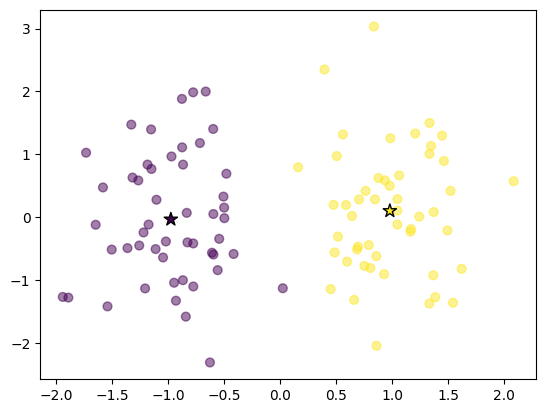

In [17]:
k_means = KMeans(n_clusters=2, random_state=17).fit(X)

plt.scatter(X[:,0], X[:,1], s=40, c=k_means.labels_, alpha=0.5)
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s=100, c=[0,1], marker="*", edgecolors="black")
plt.show()

In [15]:
from sklearn.metrics.pairwise import euclidean_distances

In [26]:
metrics = []
MAX_CLUSTERS = 7

for cluster_num in range(1, MAX_CLUSTERS + 1):
    k_means = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroids, labels = k_means.cluster_centers_, k_means.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1, -1)
        ).sum(axis=0)[0]
    print(f"{cluster_num = }, {metric = :.4f}")
    metrics.append(metric)

cluster_num = 1, metric = 135.9276
cluster_num = 2, metric = 92.3425
cluster_num = 3, metric = 78.6902
cluster_num = 4, metric = 61.1576
cluster_num = 5, metric = 54.7358
cluster_num = 6, metric = 49.7458
cluster_num = 7, metric = 46.3571


Best cluster num: 2


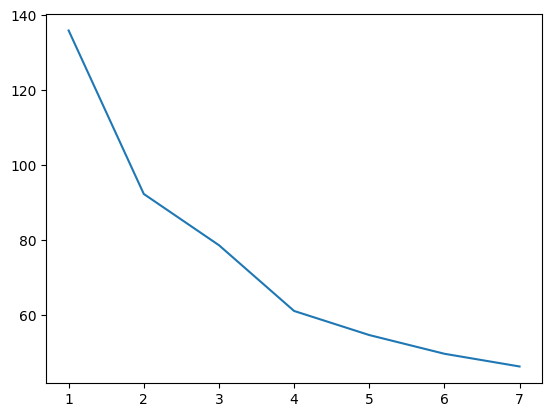

In [27]:
D = []
for i in range(len(metrics) - 1):
    d = abs(metrics[i+1] - metrics[i]) / abs(metrics[i] - metrics[i-1])
    D.append(d)
print(f"Best cluster num: {np.argmin(D) + 1}")

plt.plot(range(1, len(metrics) + 1), metrics)
plt.show()

## K-means realization

In [34]:
from scipy.spatial.distance import euclidean

Step 0, weight_evolution = [0.7600024252729154, 0.11043211187761477]
Step 1, weight_evolution = [0.3073168198316204, 0.24077384312379432]
Step 2, weight_evolution = [0.2497288163834149, 0.27914859195147934]
Step 3, weight_evolution = [0.17513479996769224, 0.1682667685964102]
Step 4, weight_evolution = [0.030261708091210857, 0.030537800022569336]
Step 5, weight_evolution = [0.0, 0.0]


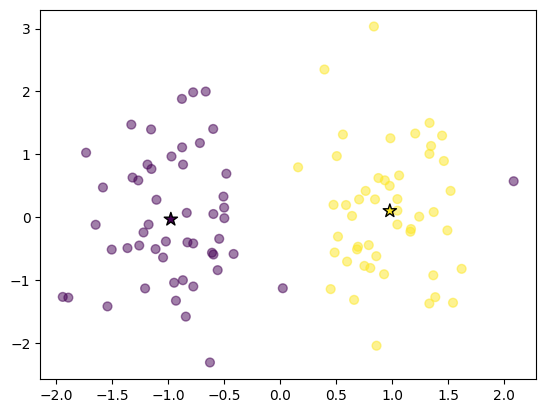

In [50]:
def random_centroids_selection(X: np.array, n: int, k: int) -> list:
    """
    Centroids initialization
    """
    result = []
    random_selection = np.random.randint(0, n, size=k)
    for obj_id in random_selection:
        result.append(X[obj_id, :])
    return result


def eval_weight_evolution(centroid_objects_prev: list, centroid_objects: list, k: int):
    """
    Calculate how centroids move by 1 step
    """
    result = []
    for i in range(k):
        dist = euclidean(
            centroid_objects_prev[i],
            centroid_objects[i]
        )
        result.append(dist)
        
    return result


def eval_cluster_labels(X, centroid_objects):
    """
    Calculate clusters labels
    """
    cluster_distance = euclidean_distances(X, centroid_objects)
    cluster_labels = cluster_distance.argmin(axis=1)
    return cluster_labels


def eval_centroids(X, k, cluster_labels):
    """
    Calculate cluster centroids
    """
    result = []
    for i in range(k):
        new_centroid = X[cluster_labels==i].mean(axis=0)
        result.append(new_centroid)
    return result


def k_means_model(X: np.array, k: int = 2, eps: float = 0.001, num_iteration: int = 10):
    """
    K-means algorithm

    :param X: train dataset
    :param k: num of clusters
    """
    centroids, cluster_labels = None, None
    try:
        n, m = X.shape
    except ValueError:
        print("X has incorrect type")
    # cluster centers random initialization
    centroid_objects_prev = [np.zeros(m) for i in range(k)]
    centroid_objects = random_centroids_selection(X, n, k)
    weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
    step = 0
    while step < num_iteration and sum(weight_evolution[i] > eps for i in range(k)) != 0:
        centroid_objects_prev = centroid_objects.copy()
        # calculate clusters labels
        cluster_labels = eval_cluster_labels(X, centroid_objects)
        # calculate clusters centroids
        centroid_objects = eval_centroids(X, k, cluster_labels)
        # how much clusters move
        weight_evolution = eval_weight_evolution(centroid_objects_prev, centroid_objects, k)
        print(f"Step {step}, {weight_evolution = }")
        step += 1
    
    return np.vstack(centroid_objects), cluster_labels

centroids, cluster_labels = k_means_model(X, k=2, num_iteration=10)

plt.scatter(X[:,0], X[:,1], s=40, c=y, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c=[0,1], marker="*", edgecolors="black")
plt.show()